# Preparing notebook

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
os.environ['PYTHONHASHSEED'] = '2'

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import keras
from keras.models import load_model

from F5_func_file import *

/usr/lib/python3.11/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.1 when it was built against 1.14.0, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


## Load model and data

In [3]:
#Load the upsampling model
upsampling_model = load_model("Upsampling_model.h5", 
                              custom_objects={"Custom_mse_conv_func": Custom_mse_conv_func, "Custom_mae_conv_func": Custom_mae_conv_func})

In [4]:
#Load the NGC 300 spiral galaxy image
#Downloadable as "Fullsize Original" 106.5 MB file from https://www.eso.org/public/images/eso1037a/ 
file_path = "eso1037a.tif"

original_image = Load_astrodata(file_path)

print("Shape:", original_image.shape)
print("Minimum:", original_image.min())
print("Maximum", original_image.max())

Shape: (7603, 7603)
Minimum: 0
Maximum 255


## Chosing segments for resolution enhancement
### Visualize spiral galaxy

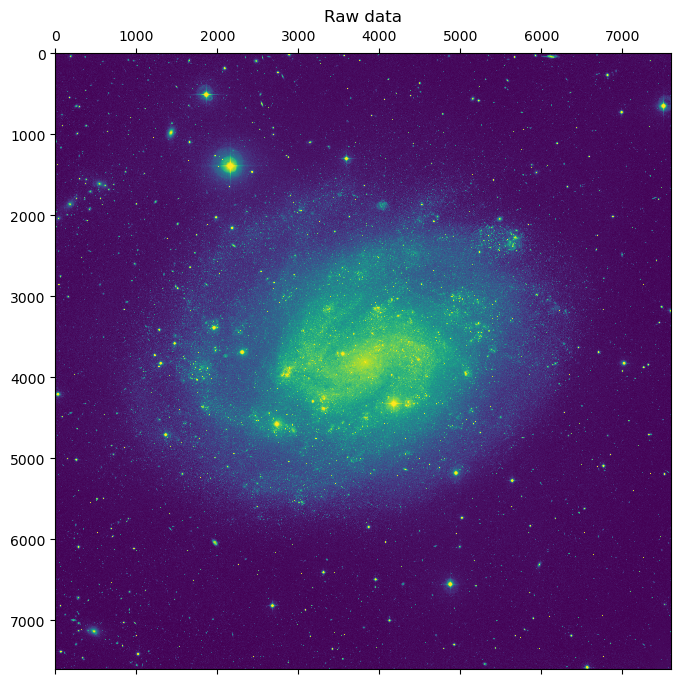

In [5]:
#Visualize the spiral galaxy image
plt.figure(figsize=(8,8))
plt.matshow(original_image, cmap="viridis", fignum=False)
plt.title("Raw data")
plt.show()

### Region for resolution enhancing

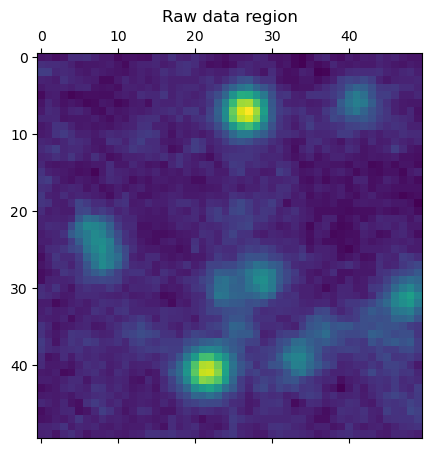

In [6]:
#Select a region in the spiral galaxy image
size_region = 50
horiz_origin_region = 4747
verti_origin_region = 1655

region = original_image[verti_origin_region:verti_origin_region+size_region,horiz_origin_region:horiz_origin_region+size_region]

plt.figure(figsize=(5,5))
plt.matshow(region, cmap="viridis", fignum=False)
plt.title("Raw data region")

plt.show()

In [7]:
#Process the region
predicted, _ = Reconstruct_data_with_model(region[None,:,:], upsampling_model)
predicted.shape

1/1 [==============================] - 2s 2s/step


(400, 400)

## Visualize results
### Set segment positions

In [8]:
#Image in panel b - size and origin
size = 32
hp = 2
vp = 16

#First segment of panel c - size and origin
size_1 = 12
hp_1 = 0
vp_1 = 3
rad_1 = (size_1-1) / 2

#Second segment of panel c - size and origin
size_2 = 13
hp_2 = 18
vp_2 = 10
rad_2 = (size_2-1) / 2

#Third segment of panel c - size and origin
size_3 = 8
hp_3 = 16
vp_3 = 21
rad_3 = (size_3-1) / 2

Text(0.5, 1.0, 'Third segment')

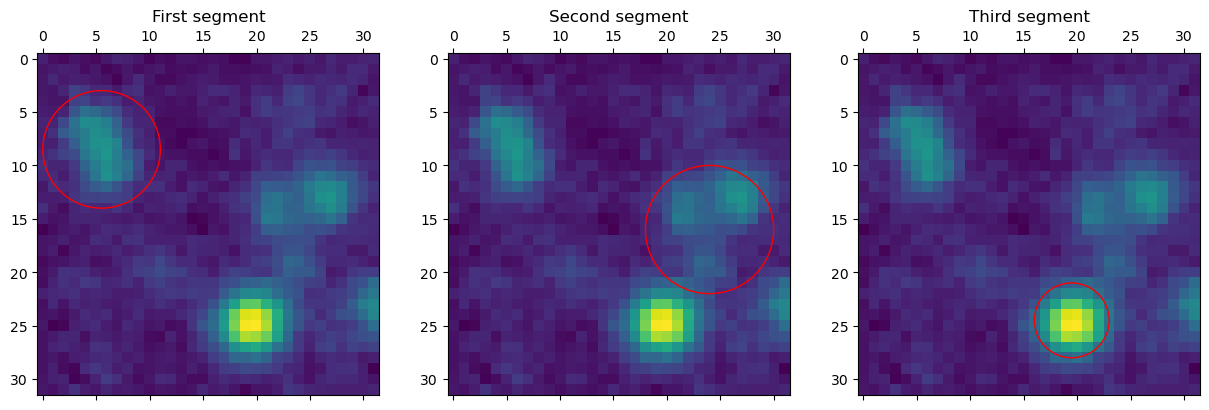

In [9]:
#Circle the chosen segments
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.matshow(region[vp:vp+size,hp:hp+size], cmap="viridis", fignum=False)
plt.gca().add_patch(mpl.patches.Circle([hp_1+rad_1,vp_1+rad_1], rad_1, linewidth=1, edgecolor='red', facecolor='none'))
plt.title("First segment")

plt.subplot(132)
plt.matshow(region[vp:vp+size,hp:hp+size], cmap="viridis", fignum=False)
plt.gca().add_patch(mpl.patches.Circle([hp_2+rad_2,vp_2+rad_2], rad_2, linewidth=1, edgecolor='red', facecolor='none'))
plt.title("Second segment")

plt.subplot(133)
plt.matshow(region[vp:vp+size,hp:hp+size], cmap="viridis", fignum=False)
plt.gca().add_patch(mpl.patches.Circle([hp_3+rad_3,vp_3+rad_3], rad_3, linewidth=1, edgecolor='red', facecolor='none'))
plt.title("Third segment")

### Visualize the reconstructions

Text(0.5, 1.0, 'Third segment - reconstructed')

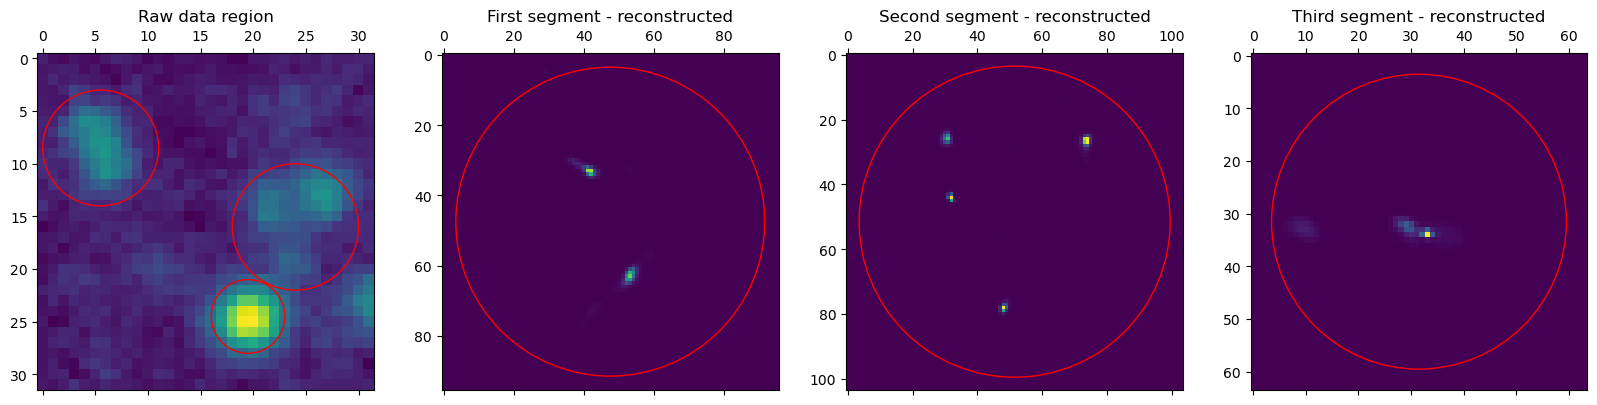

In [10]:
#Visualize the chosen segment predictions
plt.figure(figsize=(20,5))
plt.subplot(141)
plt.matshow(region[vp:vp+size,hp:hp+size], cmap="viridis", fignum=False)
plt.gca().add_patch(mpl.patches.Circle([hp_1+rad_1,vp_1+rad_1], rad_1, linewidth=1, edgecolor='red', facecolor='none'))
plt.gca().add_patch(mpl.patches.Circle([hp_2+rad_2,vp_2+rad_2], rad_2, linewidth=1, edgecolor='red', facecolor='none'))
plt.gca().add_patch(mpl.patches.Circle([hp_3+rad_3,vp_3+rad_3], rad_3, linewidth=1, edgecolor='red', facecolor='none'))
plt.title("Raw data region")

plt.subplot(142)
plt.matshow(predicted[8*(vp_1+vp):8*(vp_1+vp+size_1), 8*(hp_1+hp):8*(hp_1+hp+size_1)], cmap="viridis", fignum=False, vmin=predicted.min(), vmax=0.1*predicted.max())
plt.gca().add_patch(mpl.patches.Circle([8*rad_1+3.5,8*rad_1+3.5], 8*rad_1, linewidth=1, edgecolor='red', facecolor='none'))
plt.title("First segment - reconstructed")

plt.subplot(143)
plt.matshow(predicted[8*(vp_2+vp):8*(vp_2+vp+size_2), 8*(hp_2+hp):8*(hp_2+hp+size_2)], cmap="viridis", fignum=False, vmin=predicted.min(), vmax=0.1*predicted.max())
plt.gca().add_patch(mpl.patches.Circle([8*rad_2+3.5,8*rad_2+3.5], 8*rad_2, linewidth=1, edgecolor='red', facecolor='none'))
plt.title("Second segment - reconstructed")

plt.subplot(144)
plt.matshow(predicted[8*(vp_3+vp):8*(vp_3+vp+size_3), 8*(hp_3+hp):8*(hp_3+hp+size_3)], cmap="viridis", fignum=False, vmin=predicted.min(), vmax=0.1*predicted.max())
plt.gca().add_patch(mpl.patches.Circle([8*rad_3+3.5,8*rad_3+3.5], 8*rad_3, linewidth=1, edgecolor='red', facecolor='none'))
plt.title("Third segment - reconstructed")

### Angular distance evaluation in the third segment

#### Fit the image data

First center position:  [8.93 9.97]
Second center position: [7.6  6.36]


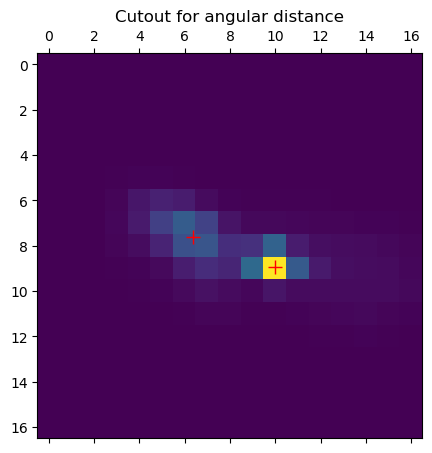

In [11]:
cutout_for_AD = predicted[8*(vp_3+vp):8*(vp_3+vp+size_3), 8*(hp_3+hp):8*(hp_3+hp+size_3)][25:42, 23:40]
fitted_params = Fit_Gauss_duo(cutout_for_AD)

position_A_duo = fitted_params[0:2]
position_B_duo = fitted_params[4:6]

plt.figure(figsize=(5,5))
plt.matshow(cutout_for_AD, cmap="viridis", fignum=False, vmin=predicted.min(), vmax=0.1*predicted.max())
plt.plot(position_A_duo[1], position_A_duo[0], '+', markersize=10, color="red")
plt.plot(position_B_duo[1], position_B_duo[0], '+', markersize=10, color="red")
plt.title("Cutout for angular distance")

print("First center position: ", position_A_duo.round(2))
print("Second center position:", position_B_duo.round(2))

#### Calculate the angular distance

In [12]:
#Calculate the pixel distance
pixel_distance = np.linalg.norm(position_A_duo - position_B_duo)
print("Approximate distance of", pixel_distance.round(2), "pixels of the 8x enlarged reconstruction grid.")
print("Approximate distance of", (pixel_distance / 8).round(2), "pixels of the original grid.")

Approximate distance of 3.85 pixels of the 8x enlarged reconstruction grid.
Approximate distance of 0.48 pixels of the original grid.


In [13]:
#Transformation ratio
original_size = original_image.shape[0]   #Galaxy image size in pixels
original_angle_size = 30.22               #Galaxy image angular size in arcmin

arcmin_per_orig_px = original_angle_size / original_size 
print("Angular-to-pixel ratio:", np.round(arcmin_per_orig_px, 5), "arcmin per original pixel")

Angular-to-pixel ratio: 0.00397 arcmin per original pixel


In [14]:
#Calculate the angular distance
arcmin_distance = arcmin_per_orig_px * pixel_distance / 8

print("Angular distance:", np.round(arcmin_distance, 5), "arcmin")
print("Angular distance:", np.round(60*arcmin_distance, 5), "arcsec ≈", np.round(60*arcmin_distance, 2), "arcsec")

Angular distance: 0.00191 arcmin
Angular distance: 0.11472 arcsec ≈ 0.11 arcsec
